In [1]:
import py4cytoscape as p4c


In [2]:
p4c.cytoscape_version_info()

{'apiVersion': 'v1',
 'cytoscapeVersion': '3.9.1',
 'automationAPIVersion': '1.4.0',
 'py4cytoscapeVersion': '1.2.0'}

In [3]:
import pandas as pd

p4c.close_session(False)

nodes = pd.read_csv('nodes_COAD.tsv', sep='\t')
edges = pd.read_csv('edges_COAD.tsv', sep='\t')

node_degree = pd.concat([edges['source'].value_counts(), edges['target'].value_counts()])
node_degree.rename('degree', inplace=True)
nodes = nodes.set_index('id').join(node_degree).reset_index()

p4c.create_network_from_data_frames(nodes, edges, title="my project", collection="DataFrame Example")



Applying default style...
Applying preferred layout


20665

In [4]:
p4c.set_node_size_mapping('id', nodes['id'].tolist(), nodes['degree'].tolist(), mapping_type='d')

style_name not specified, so updating "default" style.
style_name not specified, so updating "default" style.


''

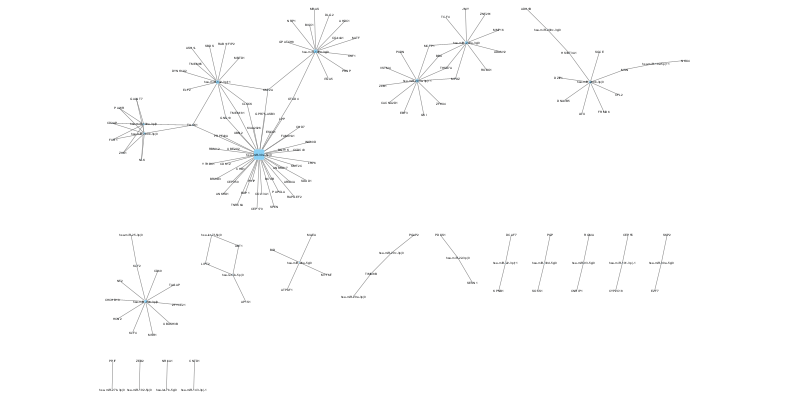

In [5]:
p4c.notebook_export_show_image()

In [11]:
p4c.sandbox_set(None)

# Download nodes_COAD.tsv to Cytoscape sandbox
res_nodes = p4c.sandbox_url_to('https://drive.google.com/file/d/1twJQO9UR6LBuOPaGgjjxDsWZNEFHvl-O/view?usp=sharing', 'nodes_COAD.tsv')
res_nodes
# Download edges_COAD.tsv to Cytoscape sandbox
res_edges = p4c.sandbox_url_to('https://drive.google.com/file/d/1CmM-TKqJ7RDe99U1e7xYWRG86GzClC3v/view?usp=sharing', 'edges_COAD.tsv')
res_edges

print(f'Network file nodes_COAD.tsv has {res_nodes["fileByteCount"]} bytes')
print(f'Network file edges_COAD.tsv has {res_edges["fileByteCount"]} bytes')

# Actually, these files are needed in the Python VM, so get them up there
p4c.sandbox_get_from('nodes_COAD.tsv')
p4c.sandbox_get_from('edges_COAD.tsv')


Network file nodes_COAD.tsv has 1222 bytes
Network file edges_COAD.tsv has 3539 bytes


{'filePath': 'C:\\Users\\CyDeveloper\\CytoscapeConfiguration\\filetransfer\\default_sandbox\\edges_COAD.tsv',
 'modifiedTime': '2022-03-15 13:43:37.0839',
 'fileByteCount': 3539}